In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우가 많다. 
# 그런 보기 싫은 부분들을 제거해주겠다.
import warnings
warnings.filterwarnings('ignore')

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 할 수 있음
import os
os.getcwd() # 현재 디렉토리 파악
# os.chdir(r"______") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-whitegrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)
    
# tqdm
from tqdm.notebook import tqdm

## 1. 데이터 불러오기

In [2]:
data_path = 'c:/reposit/data/dacon/235743_구내식당 식사 인원 예측 AI 경진대회_data/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')

train.shape, test.shape

((1205, 12), (50, 10))

In [3]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0


In [4]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [7]:
train.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614
std,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000
25%,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000
50%,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000
75%,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000
max,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000


In [8]:
test.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2956.840000,129.520000,209.220000,380.140000,298.140000
std,24.968846,84.065873,39.454593,346.564304,52.058056
min,2924.000000,50.000000,131.000000,0.000000,179.000000
25%,2924.000000,78.250000,176.500000,1.000000,257.250000
50%,2974.000000,95.000000,202.500000,465.500000,300.000000
75%,2975.000000,137.500000,245.250000,681.000000,333.250000
max,2983.000000,489.000000,279.000000,1003.000000,413.000000


In [9]:
train.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


## 2. 데이터 전처리

### 2.1 조식, 중식, 석식 메뉴 없애기

In [10]:
drop_cols = ['조식메뉴', '중식메뉴', '석식메뉴']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [11]:
train.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0


In [12]:
test.head(1)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
0,2021-01-27,수,2983,88,182,5,358.0


### 컬럼명 변경
+ 본사정원수, 본사휴가자수, 본사출장자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수 컬럼명 변경

In [13]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계'],
      dtype='object')

In [14]:
train = train.rename(columns={'본사정원수': '정원수',
                              '본사휴가자수': '휴가자수',
                              '본사출장자수': '출장자수',
                              '본사시간외근무명령서승인건수': '야근수',
                              '현본사소속재택근무자수': '재택수'})

train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택수', '중식계', '석식계'], dtype='object')

In [15]:
test = test.rename(columns={'본사정원수': '정원수',
                            '본사휴가자수': '휴가자수',
                            '본사출장자수': '출장자수',
                            '본사시간외근무명령서승인건수': '야근수',
                            '현본사소속재택근무자수': '재택수'})

train.columns

Index(['일자', '요일', '정원수', '휴가자수', '출장자수', '야근수', '재택수', '중식계', '석식계'], dtype='object')

### 2.3 일자 타입 변경 및 컬럼 추가

In [16]:
pd.DatetimeIndex(train['일자'])

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04',
               '2016-02-05', '2016-02-11', '2016-02-12', '2016-02-15',
               '2016-02-16', '2016-02-17',
               ...
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26'],
              dtype='datetime64[ns]', name='일자', length=1205, freq=None)

In [17]:
# 일자 타입 변경
train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

In [18]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1205 non-null   datetime64[ns]
 1   요일      1205 non-null   object        
 2   정원수     1205 non-null   int64         
 3   휴가자수    1205 non-null   int64         
 4   출장자수    1205 non-null   int64         
 5   야근수     1205 non-null   int64         
 6   재택수     1205 non-null   float64       
 7   중식계     1205 non-null   float64       
 8   석식계     1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 84.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      50 non-null     datetime64[ns]
 1   요일      50 non-null     object        
 2   정원수     50 non-null     int64         
 3   휴

(None, None)

In [19]:
train['일자']

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]

In [20]:
# 월, 일 컬럼 추가
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day

test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day

In [21]:
# 요일 컬럼 인코딩
# 1~5까지로 변경하기 위해 +1을 처리해줌
train['요일'] = train['일자'].dt.weekday + 1
test['요일'] = test['일자'].dt.weekday + 1

In [22]:
train.head(1)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택수,중식계,석식계,월,일
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1


In [23]:
test.head(1)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택수,월,일
0,2021-01-27,3,2983,88,182,5,358.0,1,27


### 2.4 컬럼 추가하기
+ 실근무자수
+ 식사참여율

In [27]:
# 실근무자수 컬럼 추가
# 출장자 수가 중식계와 음의 상관관계가 있기 때문에 추가함
train['실근무자수'] = train['정원수'] - train['휴가자수'] - train['출장자수'] - train['재택수']
test['실근무자수'] = test['정원수'] - test['휴가자수'] - test['출장자수'] - test['재택수']

In [30]:
# 중식참여율 컬럼 추가
train['중식참여율'] = train['중식계'] / train['실근무자수']

In [39]:
# 석식참여율 컬럼 추가
train['석식참여율'] = train['석식계'] / train['실근무자수']

# train[['야근수', '석식계']]

In [40]:
train.head(1)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택수,중식계,석식계,월,일,실근무자수,중식참여율,석식참여율
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1,2401.0,0.432736,0.137859


## 3. 시각화

In [43]:
train.corr()[['중식계', '석식계']].T

,요일,정원수,휴가자수,출장자수,야근수,재택수,중식계,석식계,월,일,실근무자수,중식참여율,석식참여율
중식계,-0.734273,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.154664,-0.097392,0.286810,0.954018,0.448772
석식계,-0.313240,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.127142,-0.185565,0.172373,0.476374,0.971782


<Axes: >

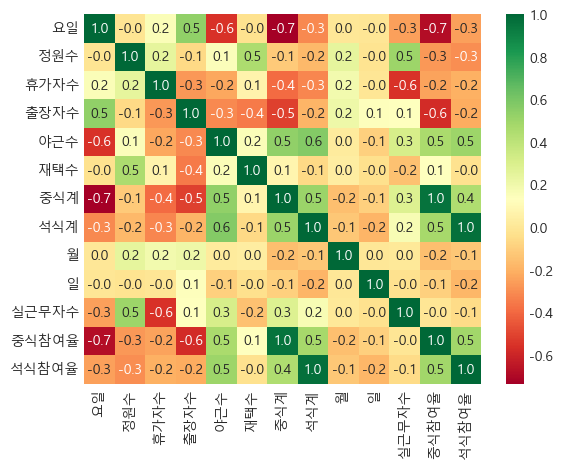

In [52]:
sns.heatmap(train.corr(), cmap='RdYlGn', annot=True, fmt='.1f')

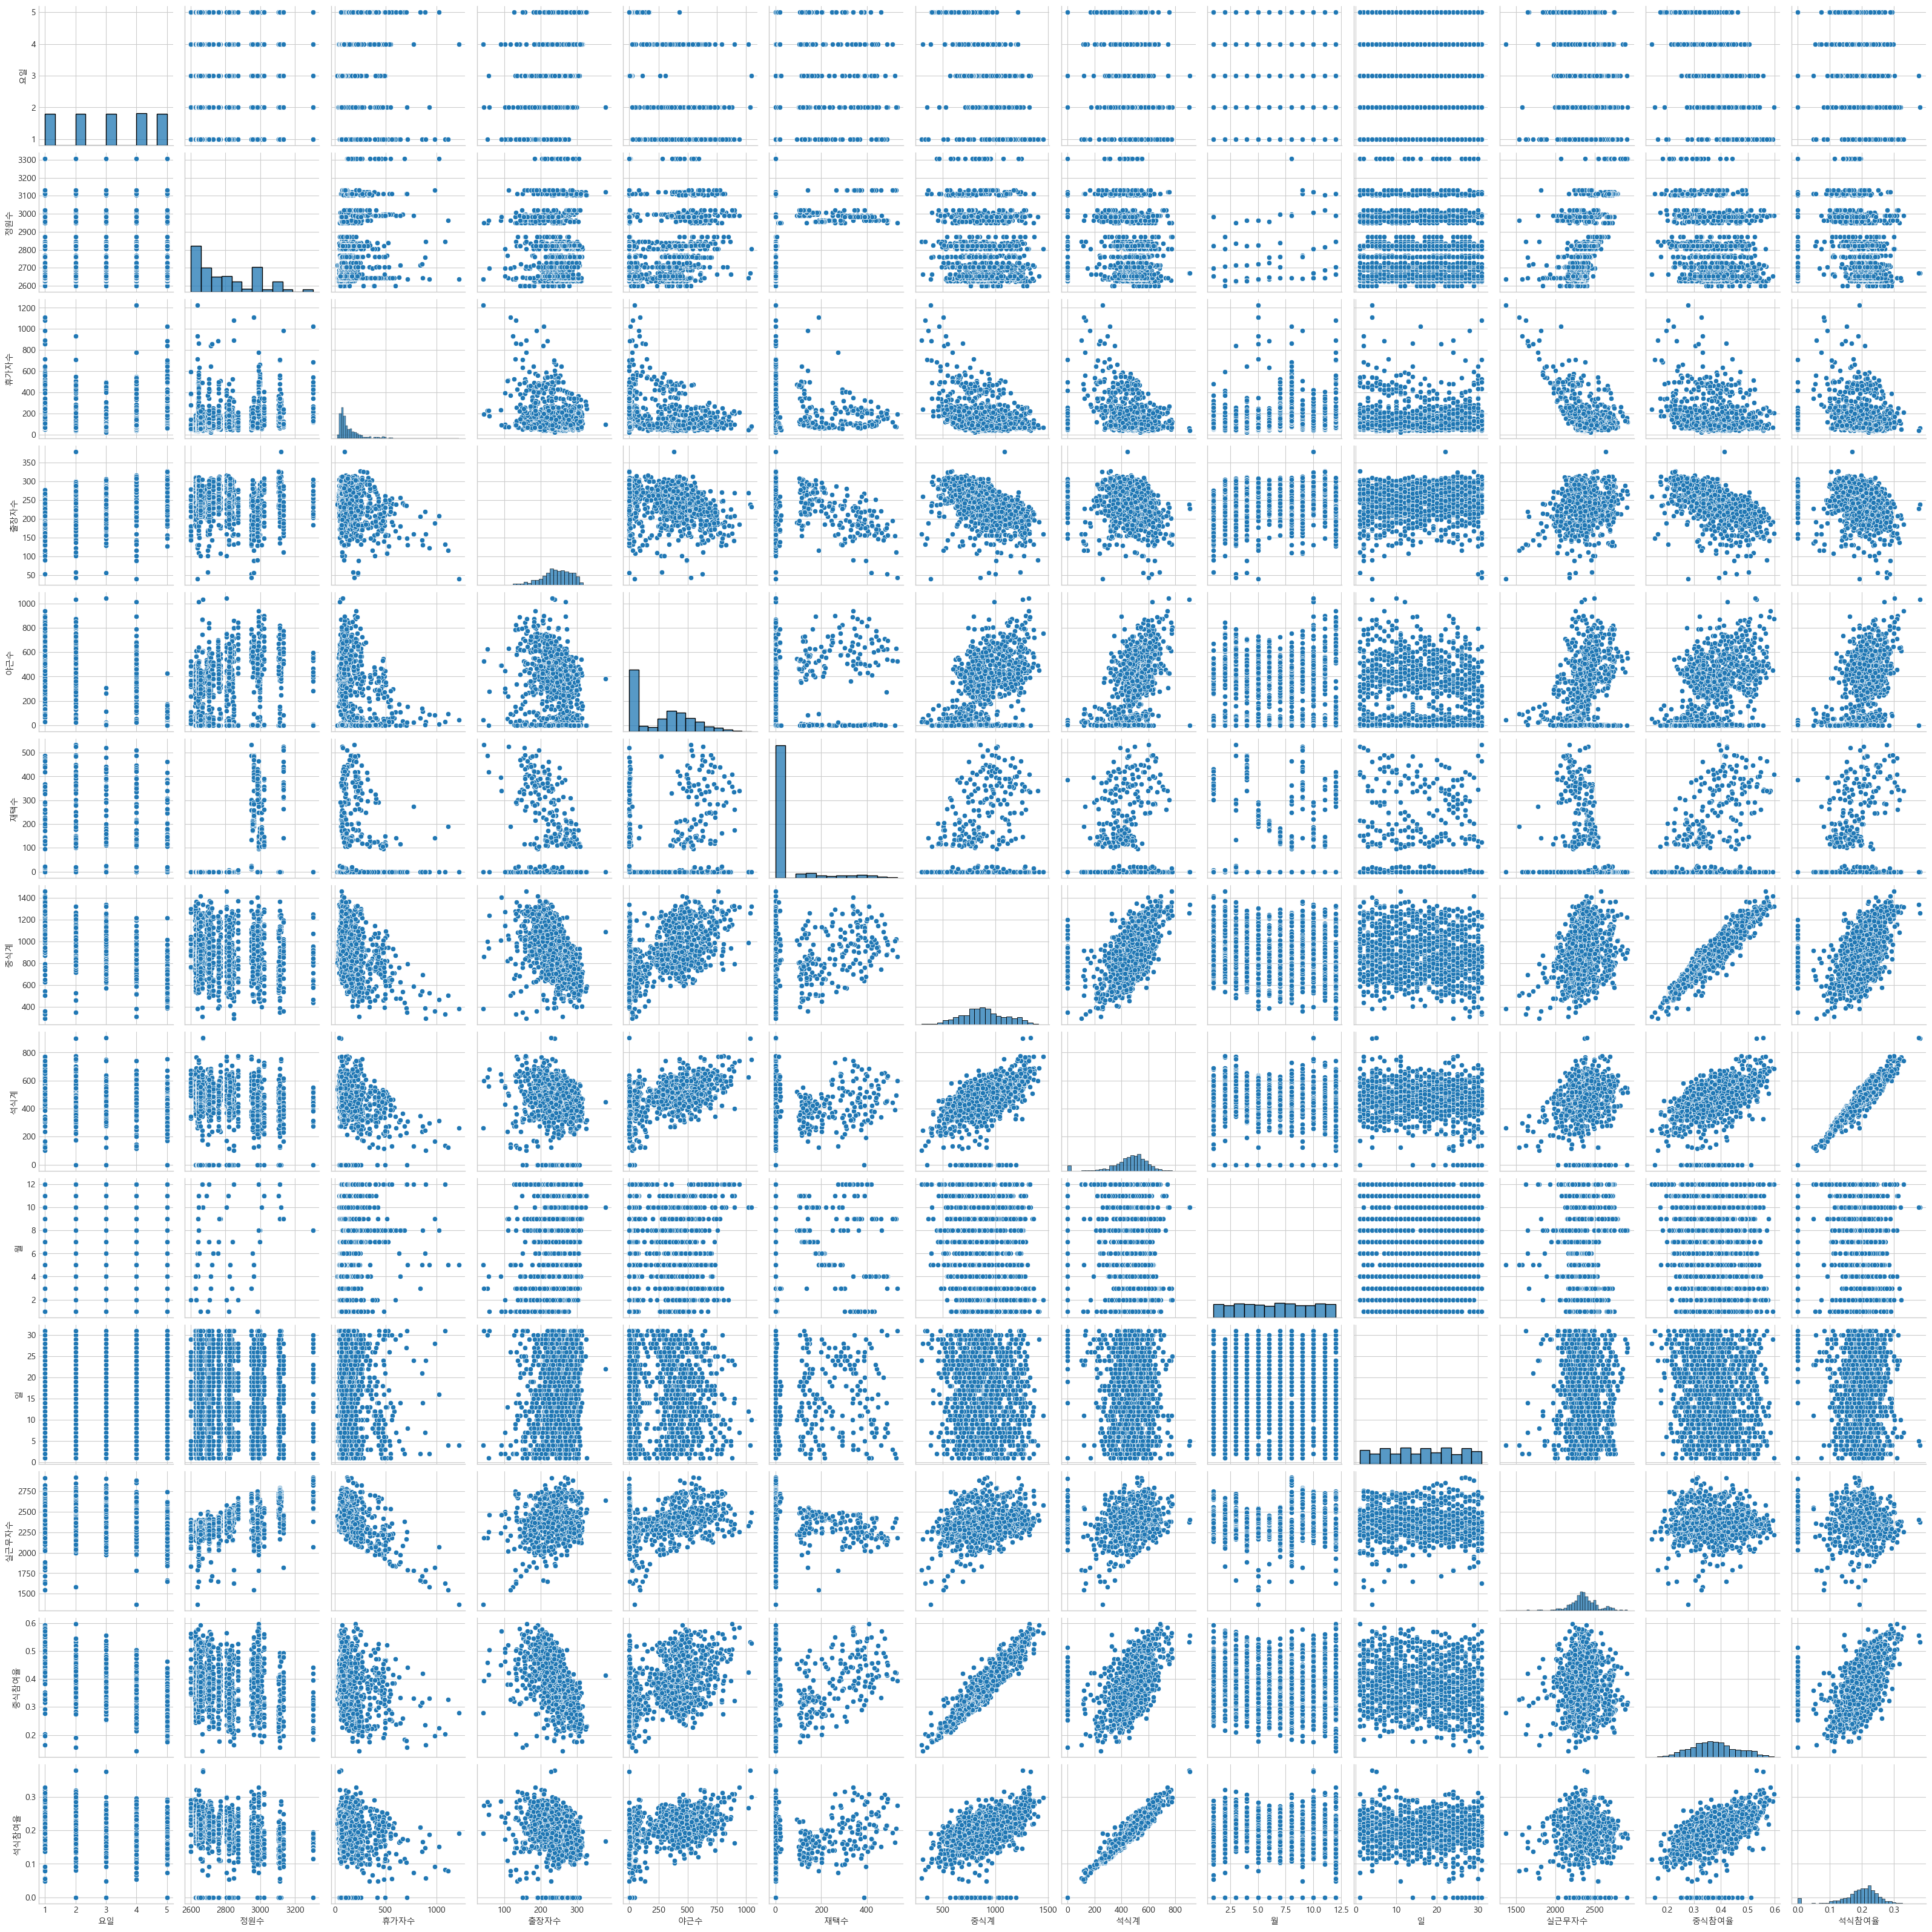

In [49]:
sns.pairplot(train)
plt.show()

### 요일별

In [56]:
tr_weekday_pivot = train.groupby(['요일'])[['실근무자수', '휴가자수', '출장자수', '야근수', '재택수', '중식계', '석식계']].mean()
tr_weekday_pivot

,실근무자수,휴가자수,출장자수,야근수,재택수,중식계,석식계
요일,,,,,,,
1,2388.141667,174.720833,203.829167,485.554167,45.708333,1146.395833,539.533333
2,2411.333333,119.004167,230.637500,457.308333,46.737500,925.620833,520.129167
3,2405.539749,113.092050,241.405858,8.209205,45.652720,905.213389,363.615063
4,2370.475410,137.372951,255.577869,379.545082,42.389344,823.991803,480.401639
5,2251.801653,244.809917,273.752066,39.061983,37.123967,653.590909,404.938017


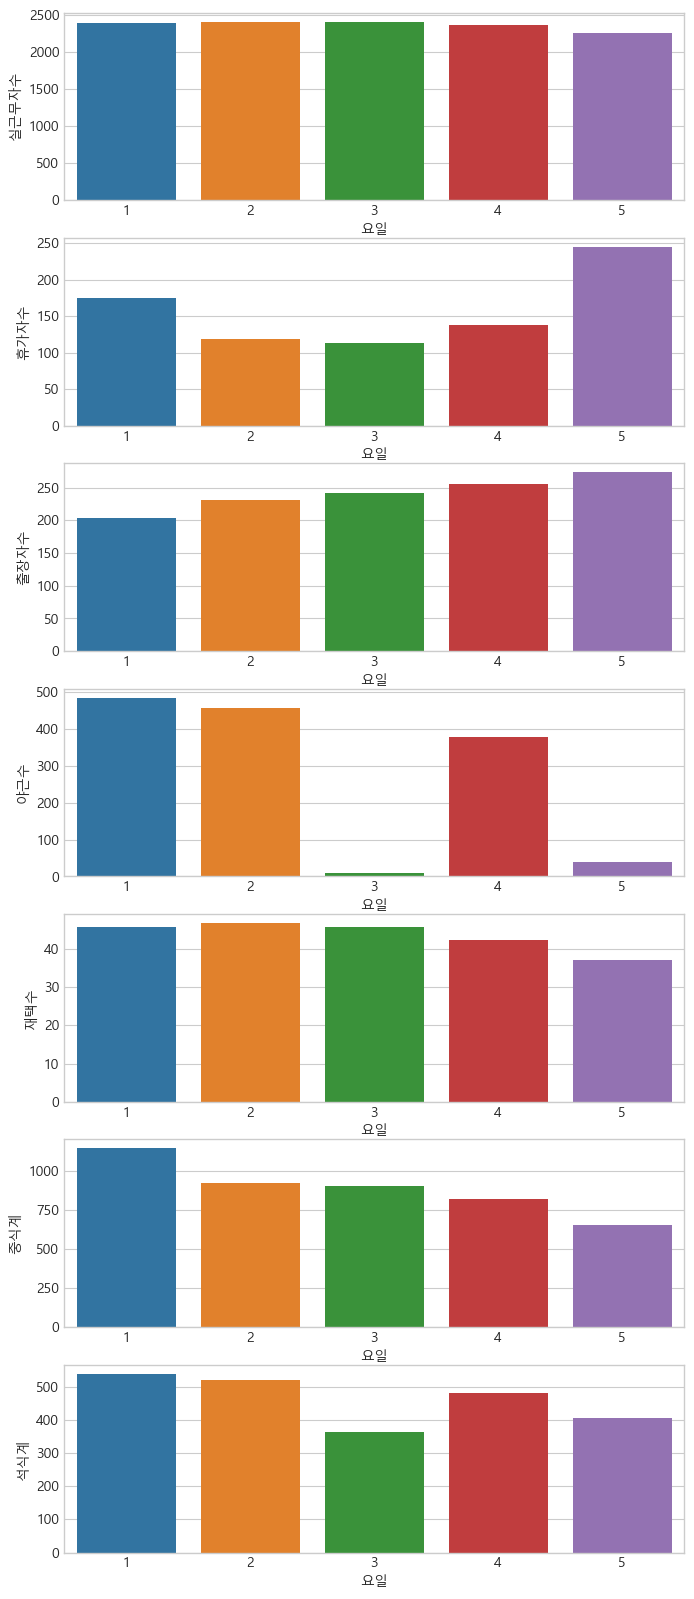

In [64]:
plt.figure(figsize=(8, 20))

for idx, col in enumerate(tr_weekday_pivot.columns):
    plt.subplot(len(tr_weekday_pivot.columns), 1, idx+1)
    sns.barplot(data=tr_weekday_pivot, x=tr_weekday_pivot.index, y=col)
    
plt.show()

## 4. 모델

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
train.head(3)

,일자,요일,정원수,휴가자수,출장자수,야근수,재택수,중식계,석식계,월,일,실근무자수,중식참여율,석식참여율
0,2016-02-01,1,2601,50,150,238,0.0,1039.0,331.0,2,1,2401.0,0.432736,0.137859
1,2016-02-02,2,2601,50,173,319,0.0,867.0,560.0,2,2,2378.0,0.364592,0.235492
2,2016-02-03,3,2601,56,180,111,0.0,1017.0,573.0,2,3,2365.0,0.430021,0.242283


In [84]:
# 데이터
X_train = train[['요일', '휴가자수', '출장자수', '야근수', '재택수', '요일', '실근무자수']]
yl_train = train['중식계']
yd_train = train['석식계']
X_train.shape, yl_train.shape, yd_train.shape

((1205, 7), (1205,), (1205,))

In [85]:
# 평가산식 :MAE(Mean Absolute Error)
lunch_model = RandomForestRegressor(criterion='absolute_error')
dinner_model = RandomForestRegressor(criterion='absolute_error')

In [86]:
lunch_model.fit(X_train, yl_train)
dinner_model.fit(X_train, yd_train)

RandomForestRegressor(criterion='absolute_error')

In [87]:
X_test = test[['요일', '휴가자수', '출장자수', '야근수', '재택수', '요일', '실근무자수']]

pred_lun = lunch_model.predict(X_test)
pred_din = dinner_model.predict(X_test)

In [82]:
df_sub = pd.read_csv(data_path + 'sample_submission.csv')
df_sub

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0
5,2021-02-03,0,0
6,2021-02-04,0,0
7,2021-02-05,0,0
8,2021-02-08,0,0
9,2021-02-09,0,0


In [88]:
df_sub['중식계'] = pred_lun
df_sub['석식계'] = pred_din

In [90]:
df_sub.to_csv(data_path + 'baseline.csv', index=False)